<a href="https://colab.research.google.com/github/akhiltiwari750/Fuel-Efficiency-Prediction/blob/main/Fuel_Efficiency_Prediction_IDS_CIA_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**The Auto MPG dataset**

Get the data

In [ ]:
!wget "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

--2022-04-29 06:18:29--  http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30286 (30K) [application/x-httpd-php]
Saving to: ‘auto-mpg.data.1’

auto-mpg.data.1     100%[===================>]  29.58K  --.-KB/s    in 0.03s   

2022-04-29 06:18:29 (1.06 MB/s) - ‘auto-mpg.data.1’ saved [30286/30286]



In [ ]:
# reading the .data file using pandas

cols = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

df = pd.read_csv('./auto-mpg.data', names=cols, na_values = "?",
                comment = '\t',
                sep= " ",
                skipinitialspace=True)

data = df.copy()

In [ ]:
##checking the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [ ]:
##checking for all the null values
data.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
##summary statistics of quantitative variables
data.describe()

MPG   Cylinders  Displacement  Horsepower       Weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   75.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  126.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       Acceleration  Model Year      Origin  
count    398.000000  398.000000  398.000000  
mean      15.568090   76.010050    1.572864  
std        2.757689    3.697627    0.802055  
min        8.000000   70.000000    1.000000  
25%       13.825000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.175000   79.000000    2.000000  
max       24.800000   82.000000    3.000000

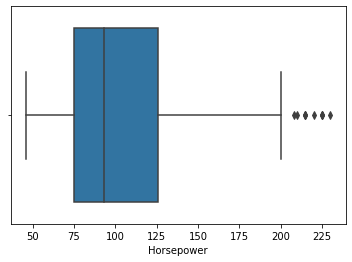

In [ ]:
sns.boxplot(x=data['Horsepower'])

In [ ]:
##imputing the values with median
median = data['Horsepower'].median()
data['Horsepower'] = data['Horsepower'].fillna(median)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


**DATA VISUALIZATION**

Installing Pandas Profiling Library inorder to explore the dataset

In [ ]:
!pip install -U pandas-profiling

Please Download the EDA.html file from the files section to download the report

In [ ]:
import pandas_profiling
#profile = df.profile_report(title="EDA", explorative = True)
profile = pandas_profiling.ProfileReport(data)
profile.to_file(output_file="EDA.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile

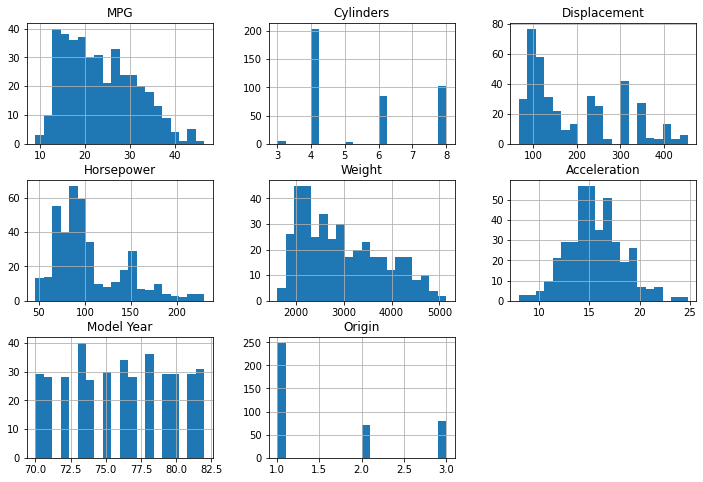

In [ ]:
data.hist(figsize=(12,8),bins=20)
plt.show()

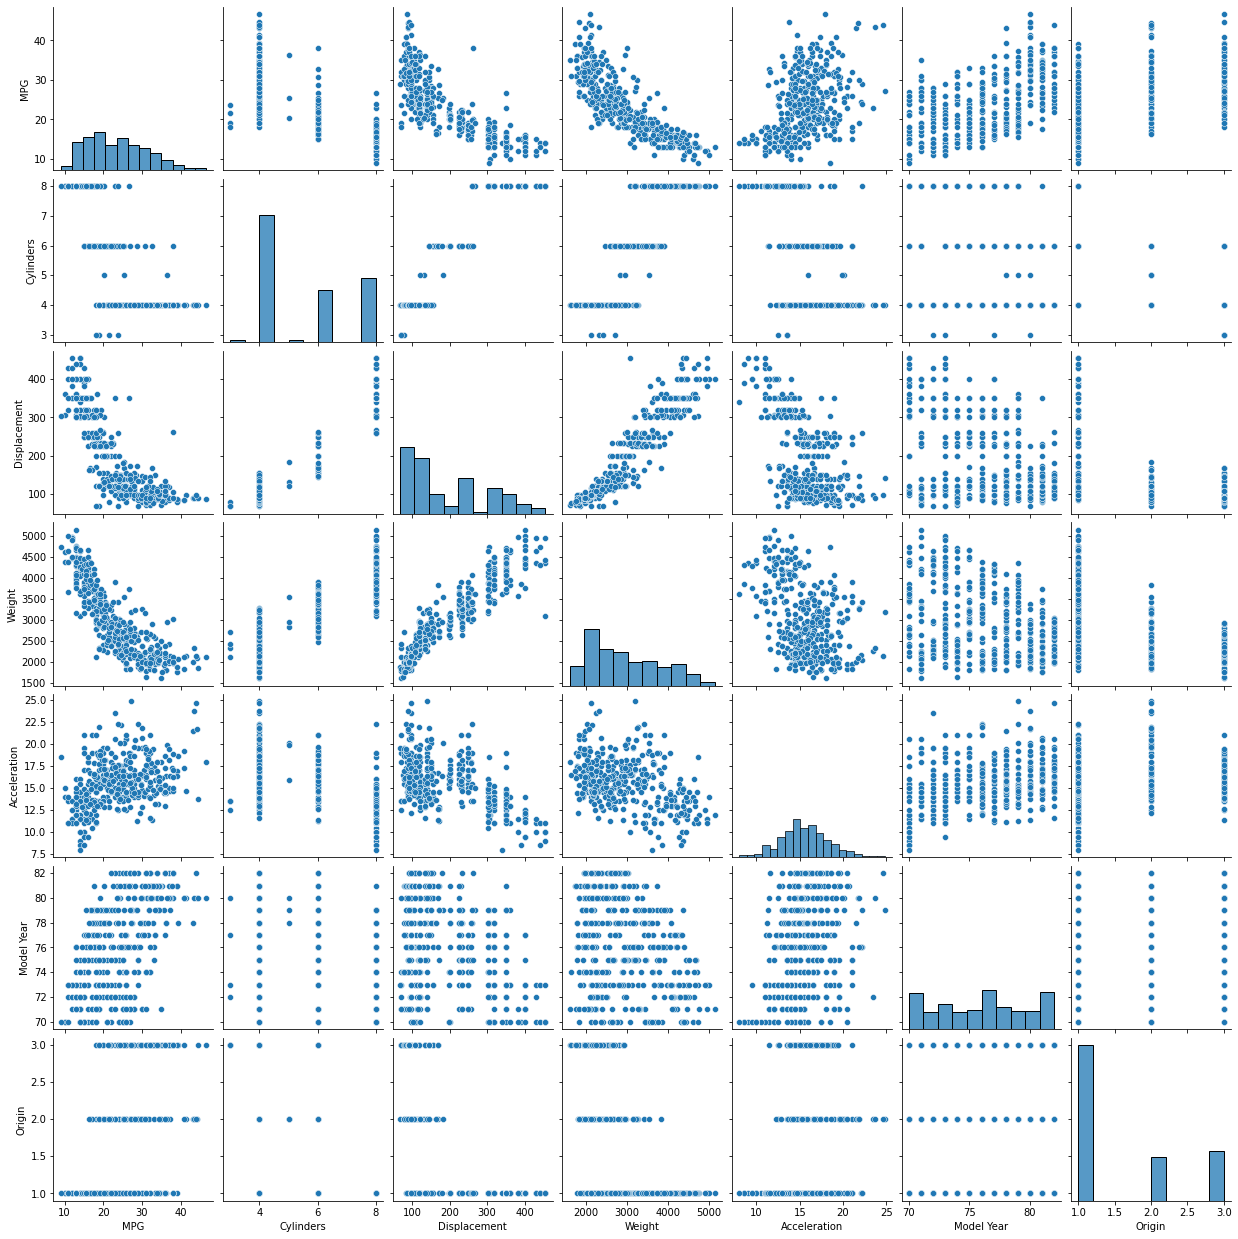

In [ ]:
# Pairplot to get a feel of the possible correlations in the data
sns.pairplot(data[["MPG", "Cylinders", "Displacement", "Weight", "Acceleration", "Model Year", "Origin"]])

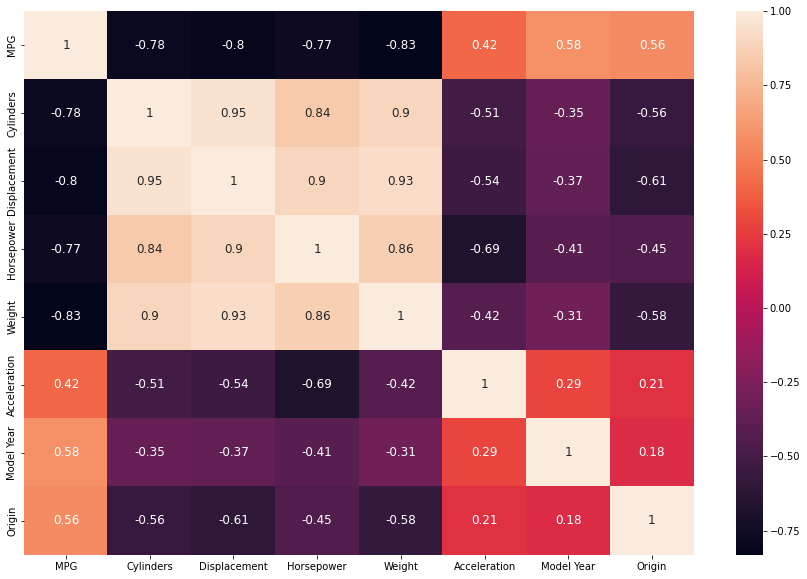

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,annot_kws={"size":12})

Splitting the dataset in train & Test Dataset

In [ ]:
from sklearn.model_selection import train_test_split
x=data.drop(columns=['MPG'])
y=data['MPG'].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=43)

**DECISION TREE**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
scaler = StandardScaler()
decision_model = DecisionTreeRegressor()
decision_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
pred=decision_model.predict(X_test)

In [ ]:
print('Accuracy',r2_score(y_test,pred))

Accuracy 0.7812623190676011


**LINEAR REGRESSION**

In [ ]:
from sklearn.linear_model import LinearRegression
scaler = StandardScaler()
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
pred=linear_model.predict(X_test)

In [ ]:
print('Accuracy',r2_score(y_test,pred))

Accuracy 0.8191716773585502


**XGBoost Regressor**

In [ ]:
from xgboost import XGBRegressor
scaler = StandardScaler()
xgb_regressor  = XGBRegressor()
xgb_regressor.fit(X_train, y_train)

[06:19:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
pred=xgb_regressor.predict(X_test)

In [ ]:
print('Accuracy',r2_score(y_test,pred))

Accuracy 0.9070525151782916


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
scaler = StandardScaler()
rf_regressor  = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
pred=rf_regressor.predict(X_test)

In [ ]:
print('Accuracy',r2_score(y_test,pred))

Accuracy 0.8925846997627558
